In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class params():
    def __init__(self):
        # lcdm
        self.omega_b = 0.022383
        self.omega_c = 0.12011
        self.theta_MC = 1.040909 / 100
        self.tau_reio = 0.0543
        self.ln10_p10_A_s = 3.0448
        self.n_s = 0.96605

        self.omega_m = 0.14314
        self.h = 0.5
        self.Omega_m = 0.3158
        self.age = 13.7971
        self.sigma8 = 0.8120
        self.S8 = 0.8331
        self.z_re = 7.68
        self.theta_ast = 1.041085 / 100
        self.r_drag_Mpc = 147.049
    
params_my_uni = params()

In [3]:
# import os

# def write_ini(model_name, ini_file_dir = 'ini/'):
#     ini_file_path = ini_file_dir + model_name + '.ini'

#     with open(ini_file_path, mode = 'w') as ini_init:
#         ini_init.write('output = tCl, lCl\n')
#         ini_init.write('write parameters = yes\n')
#         ini_init.write('omega_b = {}\n'.format(params_my_uni.omega_b))
#         ini_init.write('omega_cdm = {}\n'.format(params_my_uni.omega_c))
#         ini_init.write('tau_reio = {}\n'.format(params_my_uni.tau_reio))
#         ini_init.write('ln10^{{10}}A_s = {}\n'.format(params_my_uni.ln10_p10_A_s))
#         ini_init.write('n_s = {}\n'.format(params_my_uni.n_s))
#         ini_init.write('h = {}\n'.format(params_my_uni.h))
#         ini_init.write('modes = s\n')
#         ini_init.write('gauge = synchronous\n')
#         ini_init.write('input_verbose = 1\n')
#         ini_init.write('background_verbose = 1\n')
#         ini_init.write('thermodynamics_verbose = 1\n')
#         ini_init.write('perturbations_verbose = 1\n')
#         ini_init.write('transfer_verbose = 1\n')
#         ini_init.write('primordial_verbose = 1\n')
#         ini_init.write('spectra_verbose = 1\n')
#         ini_init.write('nonlinear_verbose = 1\n')
#         ini_init.write('lensing_verbose = 1\n')
#         ini_init.write('output_verbose = 1\n')
#         ini_init.write('l_max_scalars = 3000\n')
#         ini_init.write('root = {}/output/{}\n'.format(os.getcwd(), model_name))
#         ini_init.write('overwrite_root = yes\n')
#         ini_init.write('headers = yes\n')
#         ini_init.write('format = class')
    
#     return ini_file_path

# model_name = 'my_uni_classy'
# ini_file_path = write_ini(model_name)
# print('the address of the .ini file: {}'.format(ini_file_path))

In [4]:
# import subprocess
# from subprocess import run

# class_path = os.getcwd() + '/./class'
# def mod_model(h, omega_b, model_name, class_path = class_path):
#     params_my_uni.h = h
#     params_my_uni.omega_b = omega_b
#     ini_file_path = write_ini(model_name)
#     run('{} {}'.format(class_path, ini_file_path), shell = True, stdout = subprocess.DEVNULL, stderr = subprocess.STDOUT)

#     # if you want to see the calculation process, run the follow line instead
#     # run('{} {}'.format(class_path, ini_file_path), shell = True)

#     return

# mod_model(0.5, params_my_uni.omega_b, model_name)

In [5]:
# def fetch_Dl_class(model_name, output_dir = 'output/'):
#     Cl_path = output_dir + model_name + '_cl.dat'
#     Cl_data = np.loadtxt(Cl_path)
#     l = Cl_data[:, 0]
#     Cl_TT = Cl_data[:, 1]

#     T_cmb = 2.7255
#     def Dl_muK(C_l, T_cmb = T_cmb):
#         Dl_muK = C_l * T_cmb**2 * 1e12

#         return Dl_muK

#     return l, Dl_muK(Cl_TT)

# l_my_uni, Dl_TT_my_uni = fetch_Dl_class(model_name)

In [6]:
planck18_data_path = 'planck/COM_PowerSpect_CMB-TT-full_R3.01.txt'
planck18_bf_path = 'planck/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'

# the datapoints
planck18_Dl_data = np.loadtxt(planck18_data_path)
l_planck18 = planck18_Dl_data[:, 0]
Dl_planck18 = planck18_Dl_data[:, 1]
dDlm_planck18 = planck18_Dl_data[:, 2]
dDlp_planck18 = planck18_Dl_data[:, 3]
Dl_err_planck18 = np.array([dDlm_planck18, dDlp_planck18])
Dl_err_planck18_sum = dDlm_planck18 + dDlp_planck18
Dl_err_planck18_mean = Dl_err_planck18_sum / 2

# the best fit curve from the planck 2018 data
planck18_bf_data = np.loadtxt(planck18_bf_path)
calPlanck = 0.1000442E+01
l_planck18_bf = planck18_bf_data[:, 0]
Dl_TT_planck_bf = planck18_bf_data[:, 1] / calPlanck**2

In [7]:
def pick_cmb_plot(cmb_data, threshold = 28):
    cmb_plot_length = int(threshold + len(cmb_data[threshold:]) / 5)
    cmb_plot = np.zeros(cmb_plot_length)
    cmb_plot[: threshold] = cmb_data[:threshold]
    for i in range(threshold, cmb_plot_length):
        index = threshold + 5 * (i - threshold)
        cmb_plot[i] = cmb_data[index]

    return cmb_plot

l_planck18_plot = pick_cmb_plot(l_planck18)
Dl_planck18_plot = pick_cmb_plot(Dl_planck18)
dDlm_planck18_plot = pick_cmb_plot(dDlm_planck18)
dDlp_planck18_plot = pick_cmb_plot(dDlp_planck18)
Dl_err_planck18_plot = np.array([dDlm_planck18_plot, dDlp_planck18_plot])

In [8]:
from classy import Class

def Dl_muK(C_l, T_cmb = 2.7255):
    Dl_muK = C_l * T_cmb**2 * 1e12

    return Dl_muK

def cal_model(h, omega_b, l_max = 3000):
    params_my_uni.h = h
    params_my_uni.omega_b = omega_b
    params = {
        'output': 'tCl, lCl', 
        'lensing': 'yes', 
        'l_max_scalars': 3000, 
        'omega_b': omega_b, 
        'omega_cdm': params_my_uni.omega_c, 
        'tau_reio': params_my_uni.tau_reio, 
        'ln10^{10}A_s': params_my_uni.ln10_p10_A_s, 
        'n_s': params_my_uni.n_s, 
        'h': h, 
        # 'n_axion': 3, 
        'modes': 's', 
        'gauge': 'synchronous', 
    }
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    l = np.array(range(2, l_max + 1))
    factor = l * (l + 1) / (2 * np.pi)
    lensed_cl = cosmo.lensed_cl(l_max)
    Dl = Dl_muK(factor * lensed_cl['tt'][2:])
    
    # cosmo.struct_cleanup()
    # cosmo.empty()
    
    return l, Dl

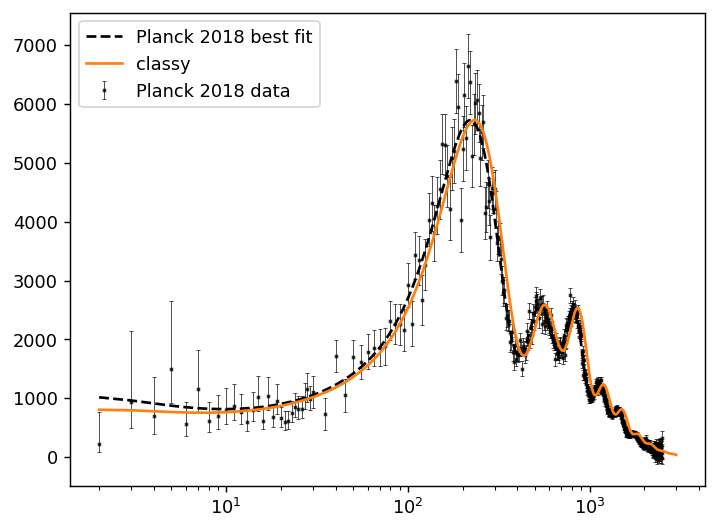

In [9]:
l, Dl = cal_model(0.5, params_my_uni.omega_b)

plt.figure(dpi = 128)
plt.errorbar(l_planck18_plot, Dl_planck18_plot, yerr = Dl_err_planck18_plot, marker = 's', mfc = 'k', mec = 'k', ms = 1, ecolor = 'k', elinewidth = 0.5, linestyle = 'none', capsize = 1, capthick = 0.5, alpha = 0.75, zorder = 0, label = 'Planck 2018 data')
plt.plot(l_planck18_bf, Dl_TT_planck_bf, color = 'k', linestyle = '--', label = 'Planck 2018 best fit')
plt.plot(l, Dl, label = 'classy')
# plt.plot(l_my_uni, Dl_TT_my_uni, label = 'class',  linestyle = '--')
plt.xscale('log')
plt.legend()
plt.show()

In [10]:
def cal_log_likelihood(theta, Dl_data, Dl_data_err, data_type = 'TT'):
    h, omega_b = theta
    
    if data_type == 'TT':
        Dl_l, Dl_model = cal_model(h, omega_b)
    
    if len(Dl_data) < len(Dl_model):
        Dl_l = Dl_l[:len(Dl_data)]
        Dl_model = Dl_model[:len(Dl_data)]
        if Dl_l[0] != 2 or Dl_l[-1] != 2508:
            raise ValueError('the data has a problem, check again. Dl_l range is ({}, {})'.format(Dl_l[0], Dl_l[-1]))
    else:
        raise ValueError('not enough data generated, len(l) = {}'.format(len(Dl_model)))
        
    sigma2 = Dl_data_err**2 +  (2 / (2 * Dl_l + 1)) * Dl_model**2
    logL = -0.5 * np.sum((Dl_data - Dl_model)**2 / sigma2 + np.log(sigma2))
    
    return logL

theta = np.array([0.5, 0.02])
log_temp = cal_log_likelihood(theta, Dl_planck18, Dl_err_planck18_mean)
log_temp

-18204.854582322085

In [11]:
def log_prior(theta):
    h, omega_b = theta
    if 0.4 < h < 0.8 and 0.01 < omega_b < 0.03:
        return 0
    
    return -np.inf

def log_probability(theta, Dl_data, Dl_data_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + cal_log_likelihood(theta, Dl_data, Dl_data_err)

In [16]:
import emcee
from tqdm import tqdm

pos = np.array([0.5, 0.02])
pos = pos + 0.1 * np.random.randn(6, 2)
nwalkers, ndim = pos.shape

start = time.time()
sampler = emcee.EnsembleSampler(
    nwalkers, 
    ndim, 
    log_probability, 
    args = (Dl_planck18, Dl_err_planck18_mean), 
)
sampler.run_mcmc(pos, 3000, progress = True)
end = time.time()

print(f'time = {end - start}')
tau = sampler.get_autocorr_time()
print(tau)

  1%|▍                                                                  | 21/3000 [00:12<1:11:34,  1.44s/it]Traceback (most recent call last):
  File "/home/weiyang/anaconda3/lib/python3.10/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_22655/2264299078.py", line 13, in log_probability
    return lp + cal_log_likelihood(theta, Dl_data, Dl_data_err)
  File "/tmp/ipykernel_22655/1622381539.py", line 5, in cal_log_likelihood
    Dl_l, Dl_model = cal_model(h, omega_b)
  File "/tmp/ipykernel_22655/374617182.py", line 28, in cal_model
    cosmo.compute()
KeyboardInterrupt
  1%|▍                                                                    | 21/3000 [00:13<31:06,  1.60it/s]

emcee: Exception while calling your likelihood function:
  params: [0.74416481 0.02292583]
  args: (array([ 225.895    ,  936.92     ,  692.238    , ..., -149.315007 ,
        -71.4742134,   51.6327312]), array([332.7155  , 831.3895  , 480.29    , ..., 111.110198, 111.4274  ,
       111.716422]))
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
pos = np.array([0.5, 0.02])
pos = pos + 0.1 * np.random.randn(6, 2)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

start = time.time()
with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers, 
        ndim, 
        log_probability, 
        args = (Dl_planck18, Dl_err_planck18_mean), 
        pool = pool,
    )
    sampler.run_mcmc(pos, 3000, progress = True)
end = time.time()
print(f'time = {end - start}')
tau = sampler.get_autocorr_time()
print(tau)

 43%|███████████████████████████▋                                     | 1280/3000 [44:41<1:00:02,  2.09s/it]Process ForkPoolWorker-40:
Process ForkPoolWorker-36:
Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Process ForkPoolWorker-37:
Process ForkPoolWorker-30:
Process ForkPoolWorker-23:
Process ForkPoolWorker-29:
Process ForkPoolWorker-34:
Process ForkPoolWorker-28:
Process ForkPoolWorker-35:
Process ForkPoolWorker-26:
Process ForkPoolWorker-27:
Process ForkPoolWorker-38:
Process ForkPoolWorker-33:
Process ForkPoolWorker-24:
Traceback (most recent call last):
Process ForkPoolWorker-39:
Process ForkPoolWorker-21:
Process ForkPoolWorker-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call l

  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/synchronize.

emcee: Exception while calling your likelihood function:
  params: [0.67449249 0.02203621]
  args: (array([ 225.895    ,  936.92     ,  692.238    , ..., -149.315007 ,
        -71.4742134,   51.6327312]), array([332.7155  , 831.3895  , 480.29    , ..., 111.110198, 111.4274  ,
       111.716422]))
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/weiyang/anaconda3/lib/python3.10/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_22655/2264299078.py", line 13, in log_probability
    return lp + cal_log_likelihood(theta, Dl_data, Dl_data_err)
  File "/tmp/ipykernel_22655/1622381539.py", line 5, in cal_log_likelihood
    Dl_l, Dl_model = cal_model(h, omega_b)
  File "/tmp/ipykernel_22655/374617182.py", line 28, in cal_model
    cosmo.compute()
KeyboardInterrupt
Process ForkPoolWorker-25:
Traceback (most recent call last):
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/weiyang/anaconda3/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  Fil

In [15]:
from multiprocessing import cpu_count
ncpu = cpu_count()

with open('script.py', 'w') as f:
    f.write(
        """
import os
import sys
import time
import emcee
import numpy as np
from tqdm import tqdm
from schwimmbad import MPIPool

class params():
    def __init__(self):
        # lcdm
        self.omega_b = 0.022383
        self.omega_c = 0.12011
        self.theta_MC = 1.040909 / 100
        self.tau_reio = 0.0543
        self.ln10_p10_A_s = 3.0448
        self.n_s = 0.96605

        self.omega_m = 0.14314
        self.h = 0.5
        self.Omega_m = 0.3158
        self.age = 13.7971
        self.sigma8 = 0.8120
        self.S8 = 0.8331
        self.z_re = 7.68
        self.theta_ast = 1.041085 / 100
        self.r_drag_Mpc = 147.049

params_my_uni = params()

planck18_data_path = 'planck/COM_PowerSpect_CMB-TT-full_R3.01.txt'
planck18_bf_path = 'planck/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'

# the datapoints
planck18_Dl_data = np.loadtxt(planck18_data_path)
l_planck18 = planck18_Dl_data[:, 0]
Dl_planck18 = planck18_Dl_data[:, 1]
dDlm_planck18 = planck18_Dl_data[:, 2]
dDlp_planck18 = planck18_Dl_data[:, 3]
Dl_err_planck18 = np.array([dDlm_planck18, dDlp_planck18])
Dl_err_planck18_mean = np.mean(Dl_err_planck18, axis = 0)

# the best fit curve from the planck 2018 data
planck18_bf_data = np.loadtxt(planck18_bf_path)
calPlanck = 0.1000442E+01
l_planck18_bf = planck18_bf_data[:, 0]
Dl_TT_planck_bf = planck18_bf_data[:, 1] / calPlanck**2

from classy import Class

def Dl_muK(C_l, T_cmb = 2.7255):
    Dl_muK = C_l * T_cmb**2 * 1e12

    return Dl_muK

def cal_model(h, omega_b, l_max = 3000):
    params_my_uni.h = h
    params_my_uni.omega_b = omega_b
    params = {
        'output': 'tCl, lCl', 
        'lensing': 'yes', 
        'l_max_scalars': 3000, 
        'omega_b': omega_b, 
        'omega_cdm': params_my_uni.omega_c, 
        'tau_reio': params_my_uni.tau_reio, 
        'ln10^{10}A_s': params_my_uni.ln10_p10_A_s, 
        'n_s': params_my_uni.n_s, 
        'h': h, 
        # 'n_axion': 3, 
        'modes': 's', 
        'gauge': 'synchronous', 
    }
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    l = np.array(range(2, l_max + 1))
    factor = l * (l + 1) / (2 * np.pi)
    lensed_cl = cosmo.lensed_cl(l_max)
    Dl = Dl_muK(factor * lensed_cl['tt'][2:])
    
    cosmo.struct_cleanup()
    cosmo.empty()
    
    return l, Dl

def cal_log_likelihood(theta, Dl_data, Dl_data_err, data_type = 'TT'):
    h, omega_b = theta
    
    if data_type == 'TT':
        Dl_l, Dl_model = cal_model(h, omega_b)
    
    if len(Dl_data) < len(Dl_model):
        Dl_l = Dl_l[:len(Dl_data)]
        Dl_model = Dl_model[:len(Dl_data)]
        if Dl_l[0] != 2 or Dl_l[-1] != 2508:
            raise ValueError('the data has a problem, check again. Dl_l range is ({}, {})'.format(Dl_l[0], Dl_l[-1]))
    else:
        raise ValueError('not enough data generated, len(l) = {}'.format(len(Dl_model)))
        
    sigma2 = Dl_data_err**2 +  (2 / (2 * Dl_l + 1)) * Dl_model**2
    logL = -0.5 * np.sum((Dl_data - Dl_model)**2 / sigma2 + np.log(sigma2))
    
    return logL

def log_prior(theta):
    h, omega_b = theta
    if 0.4 < h < 0.8 and 0.01 < omega_b < 0.03:
        return 0
    
    return -np.inf

def log_probability(theta, Dl_data, Dl_data_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + cal_log_likelihood(theta, Dl_data, Dl_data_err)

with MPIPool() as pool:
    if not pool.is_master():
        pool.wait()
        sys.exit(0)

    pos = np.array([0.5, 0.02])
    pos = pos + 0.1 * np.random.randn(6, 2)
    nwalkers, ndim = pos.shape
    nsteps = 30000
    
    sampler = emcee.EnsembleSampler(
        nwalkers, 
        ndim, 
        log_probability, 
        args = (Dl_planck18, Dl_err_planck18_mean), 
        pool = pool, 
    )
    start = time.time()
    sampler.run_mcmc(pos, nsteps, progress = True)
    end = time.time()
    print(end - start)

# pos = np.array([0.5, 0.02])
# pos = pos + 0.1 * np.random.randn(6, 2)
# nwalkers, ndim = pos.shape
# nsteps = 30000

# sampler = emcee.EnsembleSampler(
#     nwalkers, 
#     ndim, 
#     log_probability, 
#     args = (Dl_planck18, Dl_err_planck18_mean), 
# )
# start = time.time()
# sampler.run_mcmc(pos, nsteps, progress = True)
# end = time.time()
# print(end - start)
        """
    )
    
mpi_time = !mpiexec -n {ncpu} python script.py
mpi_time
mpi_time = float(mpi_time[0])
print("MPI took {0:.1f} seconds".format(mpi_time))

^C


IndexError: list index out of range

In [12]:
from IPython.display import display, Math

flat_samples = sampler.get_chain(discard = 1500, thin = 25, flat = True)
labels = [r'$h$']
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])  # the estimated value at x per cent of the array
    q = np.diff(mcmc)   # mcmc[n] - mcmc[n - 1]
    txt = 'h = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}'
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

IndexError: index -1 is out of bounds for axis 0 with size 0